## Используемый набор данных

Для анализа использовались данные индекса [S&P 500](https://www.kaggle.com/datasets/whenamancodes/sp-500-stocks), включающие следующие параметры:

1. **Date**: Дата торгов (в формате YYYY-MM-DD).
2. **Open**: Цена открытия.
3. **High**: Максимальная цена за день.
4. **Low**: Минимальная цена за день.
5. **Close**: Цена закрытия.
6. **Adj Close**: Скорректированная цена закрытия (с учетом корпоративных действий, таких как сплиты).
7. **Volume**: Объем торгов.

Данные охватывают длительный временной период и позволяют изучать как долгосрочные тренды, так и краткосрочные изменения на рынке. Анализ включает работу с волатильностью (разницей между High и Low) и взаимосвязь между различными параметрами.

In [1]:
import pandas as pd

In [3]:
sp500_data = pd.read_csv('sp_500.csv')

sp500_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 01, 2022","3,936.73","4,119.28","3,610.40","3,640.47","3,640.47","88,667,050,000"
1,"Aug 01, 2022","4,112.38","4,325.28","3,954.53","3,955.00","3,955.00","78,088,520,000"
2,"Jul 01, 2022","3,781.00","4,140.15","3,721.56","4,130.29","4,130.29","68,021,140,000"
3,"Jun 01, 2022","4,149.78","4,177.51","3,636.87","3,785.38","3,785.38","86,799,060,000"
4,"May 01, 2022","4,130.61","4,307.66","3,810.32","4,132.15","4,132.15","89,128,130,000"


In [4]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       453 non-null    object
 1   Open       453 non-null    object
 2   High       453 non-null    object
 3   Low        453 non-null    object
 4   Close      453 non-null    object
 5   Adj Close  453 non-null    object
 6   Volume     453 non-null    object
dtypes: object(7)
memory usage: 24.9+ KB


## Набор данных был успешно загружен. Вот первые наблюдения:

### Обзор столбцов:
- Data: Тип Object (string), необходимо преобразовать в datetime.
- Open, High, Low, Close, Adj Close: Все являются объектными типами, представляющими цены. Их необходимо преобразовать в числовые (float), удалив все запятые.
- Volume (объем): Объектный тип, представляющий объем проданных акций. Он также требует преобразования в числовой (integer) после удаления запятых.
### Количество строк и столбцов:
- Всего строк: 453
- Всего столбцов: 7

---

In [5]:
# Convert Date to datetime
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

In [6]:
# Remove commas
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    sp500_data[col] = sp500_data[col].str.replace(',', '').astype(float)

In [7]:
missing_values = sp500_data.isnull().sum()
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
duplicates = sp500_data.duplicated().sum()
duplicates

0

In [9]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       453 non-null    datetime64[ns]
 1   Open       453 non-null    float64       
 2   High       453 non-null    float64       
 3   Low        453 non-null    float64       
 4   Close      453 non-null    float64       
 5   Adj Close  453 non-null    float64       
 6   Volume     453 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 24.9 KB


## Набор данных был очищен, и типы данных были успешно преобразованы:

### Обновленная информация о наборе данных:
- Дата: Преобразовано в datetime64.
- Open, High, Low, Close, Adj Close, Volume: Преобразовано в float64.
### Пропущенные значения:
- Ни в одном столбце не обнаружено отсутствующих значений.
### Дубликаты:
- Дубликатов строк не обнаружено.

### Теперь данные готовы к анализу. 

---

In [10]:
statistics_summary = sp500_data.describe().T
statistics_summary['median'] = sp500_data.median()

statistics_summary


,count,mean,min,25%,50%,75%,max,std,median
Date,453,2003-10-31 19:17:05.165562880,1985-01-01 00:00:00,1994-06-01 00:00:00,2003-11-01 00:00:00,2013-04-01 00:00:00,2022-09-01 00:00:00,NaN,2003-11-01 00:00:00
Open,453.0,1318.239272,167.2,462.69,1144.94,1569.18,4778.14,1000.221795,1144.94
High,453.0,1363.202274,180.27,471.29,1190.58,1597.57,4818.62,1035.104238,1190.58
Low,453.0,1271.566932,163.36,454.36,1106.42,1536.03,4560.0,962.091777,1106.42
Close,453.0,1325.109029,179.63,463.56,1147.39,1597.57,4766.18,1002.905691,1147.39
Adj Close,453.0,1325.109029,179.63,463.56,1147.39,1597.57,4766.18,1002.905691,1147.39
Volume,453.0,43405679801.324501,1860160000.0,6152870000.0,29981510000.0,75848510000.0,161843640000.0,37694212883.436737,29981510000.0


Основные статистические показатели для числовых переменных были рассчитаны и представлены в таблице. Вы можете ознакомиться с такими метриками, как среднее, медиана, стандартное отклонение, минимальное и максимальное значения, а также квартильные значения.

На основе этих данных можно сделать следующие предварительные выводы:

### Цены (Open, High, Low, Close, Adj Close):
- Средние и медианные значения близки друг к другу, что может указывать на отсутствие сильных выбросов.
- Стандартное отклонение свидетельствует о значительных изменениях цен акций на протяжении наблюдаемого периода.

### Объемы (Volume):
- Средний объем торгов значительно превышает медианный, что указывает на возможное наличие дней с аномально высоким объемом торгов.

---

In [11]:
import matplotlib.pyplot as plt

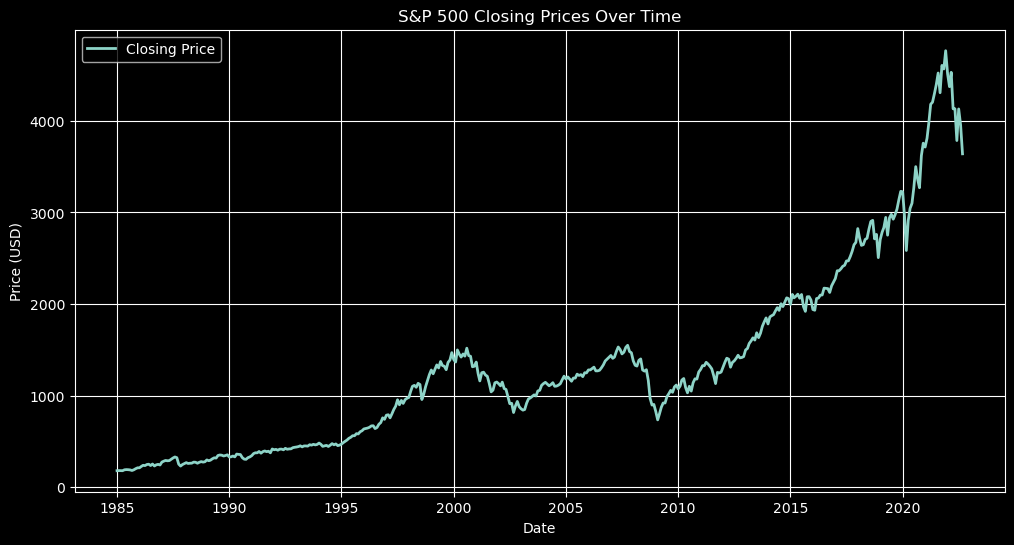

In [14]:
# Time Series of Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], sp500_data['Close'], label='Closing Price', linewidth=2)
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

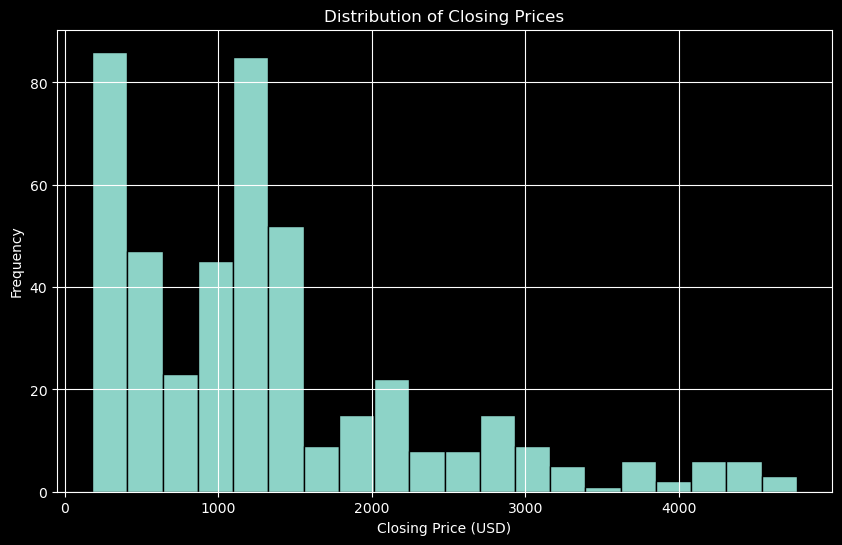

In [15]:
# Histogram of Closing Prices
plt.figure(figsize=(10, 6))
plt.hist(sp500_data['Close'], bins=20, edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/var/folders/bw/xn7fzq7s19345glv1sllmzdc0000gn/T/ipykernel_88771/522564061.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sp500_data['Close'], price_range], labels=['Close', 'Price Range'])


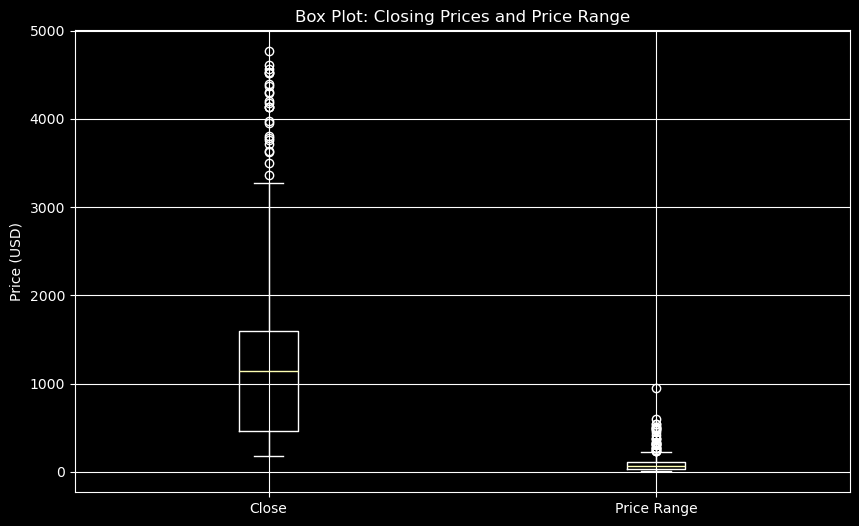

In [16]:
# Box Plot for Price Range (High-Low) vs. Close
price_range = sp500_data['High'] - sp500_data['Low']
plt.figure(figsize=(10, 6))
plt.boxplot([sp500_data['Close'], price_range], labels=['Close', 'Price Range'])
plt.title('Box Plot: Closing Prices and Price Range')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

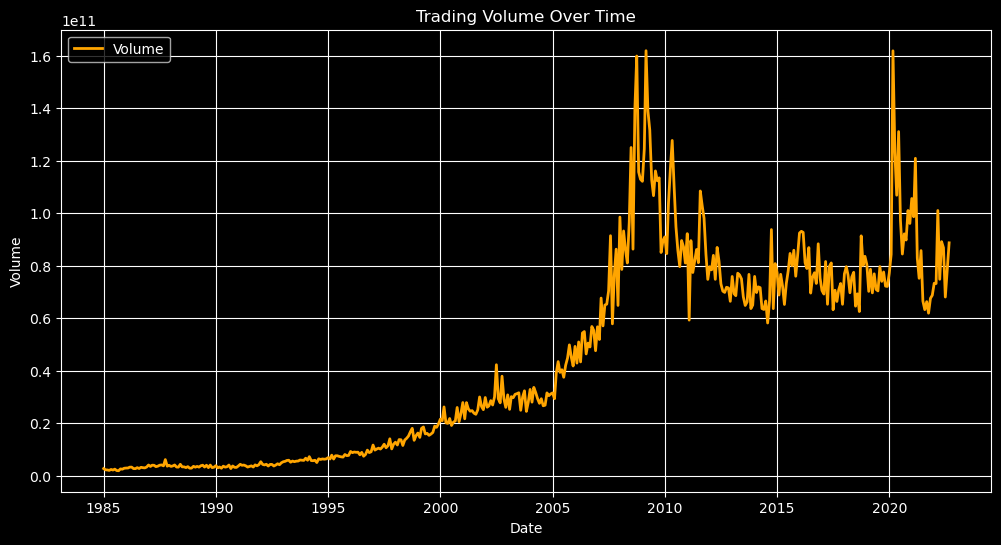

In [17]:
# Volume over Time
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], sp500_data['Volume'], label='Volume', color='orange', linewidth=2)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

## Анализ результатов и выводы:
### 1. Динамика закрывающихся цен (Closing Prices):
- Основной тренд: За последние десятилетия наблюдается рост стоимости индекса S&P 500, что указывает на долгосрочное развитие экономики и рост стоимости акций крупных компаний.
- Резкие падения на графике, такие как во время финансовых кризисов (2008, пандемия 2020), показывают значительное влияние макроэкономических факторов на рынок.
- Закрывающиеся цены — одна из ключевых переменных для анализа, так как они отражают итоговые рыночные ожидания за день.
### 2. Распределение цен:
- Большая часть данных сосредоточена в нижнем диапазоне цен, что связано с тем, что индекс S&P 500 значительно вырос только в последние годы. Это также подчеркивает важность временного анализа.
### 3. Диапазон цен (High-Low):
- Box-plot показал, что разброс между максимальной и минимальной ценами за день относительно стабилен, но выбросы могут свидетельствовать о высоких колебаниях рынка в определенные дни (например, кризисы или значительные новости).
### 4. Объемы торгов (Volume):
- Данные показывают значительный рост объемов торговли после 2000 года, что может быть связано с внедрением новых технологий, ростом доступности рынка для частных инвесторов и увеличением автоматизированной торговли.
- Периоды с высоким объемом часто совпадают с кризисами или значимыми экономическими событиями, что делает объем торговли важным индикатором рыночной активности.
## Ключевые переменные:
- Closing Prices: Главный индикатор трендов и результат рыночных операций.
- Volume: Указывает на степень активности рынка и может служить ранним сигналом изменений.
- High и Low: Помогают анализировать волатильность рынка.

## Возможные доработки:
- Временные окна: Рассмотреть данные по месяцам, кварталам или годам, чтобы лучше понять среднесрочные тренды.
- Волатильность: Добавить столбец, показывающий дневную волатильность (разницу между High и Low), для анализа рыночной нестабильности.
- Анализ взаимосвязей: Выявить корреляции между объемом торгов и дневной волатильностью, чтобы понять, как они связаны.
- Кризисные периоды: Исследовать отдельно периоды кризисов (2008, 2020), чтобы понять их влияние на рынок.

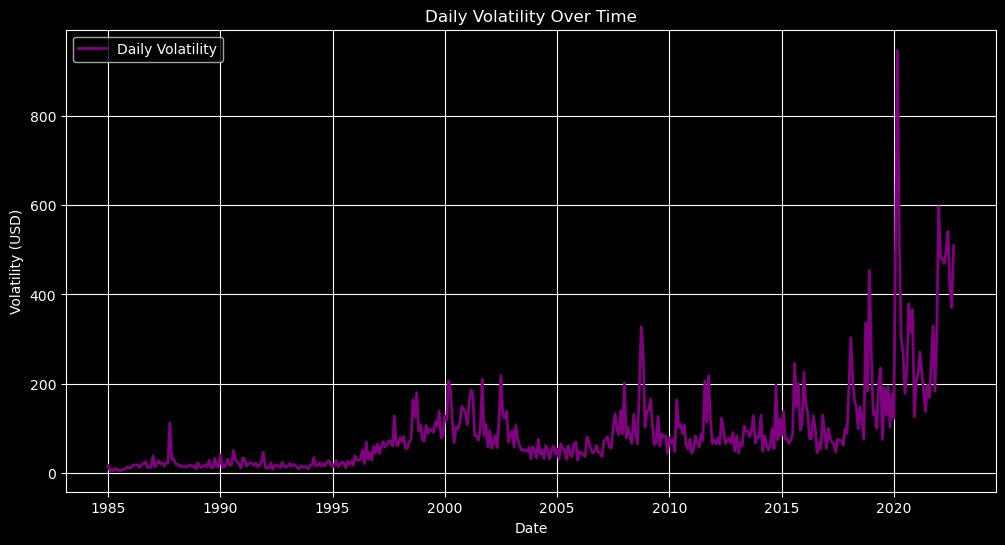

,Close,Volume,Volatility
Close,1.000000,0.652515,0.711362
Volume,0.652515,1.000000,0.571605
Volatility,0.711362,0.571605,1.000000


In [18]:
sp500_data['Volatility'] = sp500_data['High'] - sp500_data['Low']

correlation_matrix = sp500_data[['Close', 'Volume', 'Volatility']].corr()

plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], sp500_data['Volatility'], label='Daily Volatility', color='purple', linewidth=2)
plt.title('Daily Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (USD)')
plt.grid(True)
plt.legend()
plt.show()

correlation_matrix

### Добавлена новая метрика:
- Волатильность (Volatility): разница между максимальной и минимальной ценами за день.
### Корреляционный анализ:
- Закрывающиеся цены (Close) и волатильность (Volatility):
    - Корреляция 0.71 указывает на сильную положительную связь между ростом цен и увеличением волатильности. Это может означать, что в периоды роста рынка волатильность также увеличивается.
- Закрывающиеся цены (Close) и объем торгов (Volume):
    - Корреляция 0.65 показывает умеренную связь. Это подтверждает, что активность торговли частично зависит от ценовых трендов.
- Волатильность (Volatility) и объем торгов (Volume):
    - Корреляция 0.57 указывает на связь, которая предполагает, что высокие объемы торговли связаны с днями высокой волатильности, например, в кризисные периоды.
### График волатильности:
- Наблюдается повышение волатильности в ключевые кризисные периоды (например, 2008, 2020).
- После 2020 года волатильность остается на высоком уровне, что может быть связано с макроэкономической нестабильностью.
### Выводы:
- Волатильность является важным показателем для анализа состояния рынка, особенно в кризисные периоды.
- Объем торгов и закрывающиеся цены играют значимую роль, отражая уровень активности и интереса участников рынка.
- Наблюдается сильная связь между волатильностью, объемами торгов и закрывающимися ценами, что подтверждает их взаимное влияние.

---

In [20]:
import seaborn as sns

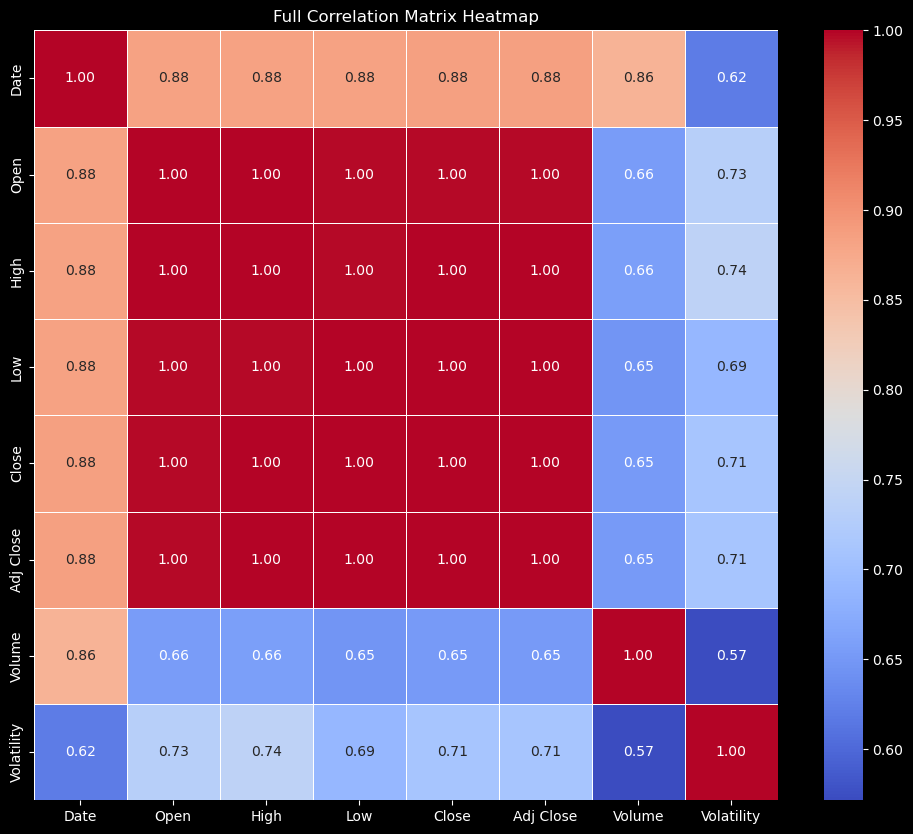

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility
Date,1.000000,0.883690,0.883110,0.884500,0.884640,0.884640,0.862983,0.618735
Open,0.883690,1.000000,0.999141,0.997403,0.997072,0.997072,0.655203,0.731245
High,0.883110,0.999141,1.000000,0.997448,0.998396,0.998396,0.657006,0.739533
Low,0.884500,0.997403,0.997448,1.000000,0.998710,0.998710,0.646236,0.689587
Close,0.884640,0.997072,0.998396,0.998710,1.000000,1.000000,0.652515,0.711362
Adj Close,0.884640,0.997072,0.998396,0.998710,1.000000,1.000000,0.652515,0.711362
Volume,0.862983,0.655203,0.657006,0.646236,0.652515,0.652515,1.000000,0.571605
Volatility,0.618735,0.731245,0.739533,0.689587,0.711362,0.711362,0.571605,1.000000


In [21]:
full_correlation_matrix = sp500_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(full_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Full Correlation Matrix Heatmap')
plt.show()

full_correlation_matrix

### Выводы на основе полной матрицы корреляции и тепловой карты:
1. Сильная корреляция между Open, High, Low, Close, и Adj Close (близка к 1):
    - Все основные ценовые переменные тесно связаны, что ожидаемо, так как они отражают динамику рынка за день. Их значения часто взаимозависимы.
2. Корреляция между объемом торгов (Volume) и ценами:
    - Умеренная корреляция (~0.65) между объемом торгов и ценами указывает на то, что повышение цен сопровождается увеличением торговой активности, но эта связь не абсолютна.
3. Корреляция между волатильностью (Volatility) и ценами:
    - Волатильность показывает заметную положительную корреляцию (~0.71–0.74) со всеми ценовыми переменными. Это подтверждает, что периоды высокой рыночной активности и неопределенности связаны с более значительными колебаниями цен.
4. Корреляция между объемом торгов и волатильностью:
    - Умеренная корреляция (0.57) предполагает, что рост торговых объемов сопровождается более значительными ценовыми колебаниями, что характерно для кризисных или новостных событий.
### Основные наблюдения:
- Цены: Взаимосвязаны между собой, что подчеркивает стабильную структуру рыночных данных.
- Волатильность: Сильно коррелирует с ценами, что делает её ключевым индикатором нестабильности на рынке.
- Объем торгов: Менее связан с волатильностью и ценами, но его рост сопровождается заметным увеличением волатильности.

**Эти взаимосвязи подтверждают, что для анализа рыночной динамики важно учитывать комбинацию цен, волатильности и объемов торгов.**

---

# Общий вывод по исследуемому датасету

## Основные результаты анализа:

1. **Тренды цен:**
   - Долгосрочный восходящий тренд в закрывающихся ценах (Close), отражающий рост рынка и экономики США.
   - Краткосрочные падения цен связаны с кризисами (например, 2008 и 2020 годы), что демонстрирует чувствительность рынка к макроэкономическим факторам.

2. **Волатильность:**
   - Волатильность является ключевым индикатором нестабильности рынка, показывая сильную связь с ценами и объемами торгов.
   - В периоды высокой волатильности наблюдаются как значительные колебания цен, так и рост торговой активности.

3. **Объемы торгов:**
   - Увеличение объема торговли часто сопровождает периоды высокой волатильности, что говорит о росте интереса участников рынка в нестабильные времена.
   - Умеренная корреляция между объемами торгов и ценами указывает на связь активности рынка с изменениями цен.

## Возможные способы применения результатов:

1. **Прогнозирование цен и волатильности:**
   - На основе выявленных взаимосвязей можно разработать модели прогнозирования рыночной волатильности, которые помогут трейдерам и инвесторам принимать более информированные решения.

2. **Управление рисками:**
   - Анализ волатильности в сочетании с объемами торгов может использоваться для управления портфелем, помогая минимизировать риски в периоды кризисов.

3. **Индикаторы для торговых стратегий:**
   - Полученные данные о связи цен, объемов и волатильности можно интегрировать в торговые стратегии, например, для идентификации точек входа и выхода.

4. **Мониторинг рынка:**
   - Анализ временных трендов волатильности и объемов торгов может быть использован для раннего обнаружения нестабильных периодов.

5. **Анализ рыночных событий:**
   - Исследование исторических данных (например, влияния кризисов) может помочь в оценке воздействия макроэкономических факторов на рынок.

## Перспективы дальнейшего анализа:

- **Временные ряды:** Построение прогнозных моделей с использованием методов анализа временных рядов.
- **Кризисный анализ:** Углубленное изучение периодов высокой волатильности для понимания поведения рынка в нестабильные времена.
- **Сегментация данных:** Разделение рынка на отдельные сектора (технологии, финансы и т.д.) для анализа их вклада в общий индекс.